In [49]:
from pycaret.classification import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Input Data

In [50]:
df = pd.read_csv('./heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Initializing the setup 

In [51]:
setup(data=df,target='HeartDisease',transformation=True,feature_interaction=True,trigonometry_features=True,feature_selection=True)

,Description,Value
0,session_id,3331
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(918, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


(5,
 False,
 [('Setup Config',
                                  Description             Value
   0                               session_id              3331
   1                                   Target      HeartDisease
   2                              Target Type            Binary
   3                            Label Encoded              None
   4                            Original Data         (918, 12)
   5                           Missing Values             False
   6                         Numeric Features                 5
   7                     Categorical Features                 6
   8                         Ordinal Features             False
   9                High Cardinality Features             False
   10                 High Cardinality Method              None
   11                   Transformed Train Set         (642, 24)
   12                    Transformed Test Set         (276, 24)
   13                      Shuffle Train-Test              True
   14    

## Split Data

In [52]:
x = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [54]:
x_train.shape

(734, 11)

In [55]:
x_test.shape

(184, 11)

## Model Training

In [56]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8708,0.9302,0.8995,0.8743,0.8859,0.7369,0.7391,0.7840
rf,Random Forest Classifier,0.8707,0.9282,0.8967,0.8762,0.8856,0.7371,0.7390,0.0460
lda,Linear Discriminant Analysis,0.8707,0.9302,0.9023,0.8736,0.8867,0.7363,0.7390,0.0060
et,Extra Trees Classifier,0.8707,0.9286,0.8883,0.8825,0.8849,0.7375,0.7383,0.0400
knn,K Neighbors Classifier,0.8692,0.9072,0.8912,0.8797,0.8840,0.7340,0.7370,0.6440
ridge,Ridge Classifier,0.8692,0.0000,0.9023,0.8715,0.8856,0.7330,0.7359,0.0040
gbc,Gradient Boosting Classifier,0.8676,0.9275,0.8939,0.8742,0.8829,0.7306,0.7333,0.0300
lr,Logistic Regression,0.8645,0.9273,0.8968,0.8684,0.8811,0.7237,0.7270,0.8780
nb,Naive Bayes,0.8598,0.9170,0.8827,0.8699,0.8758,0.7150,0.7161,0.0040
xgboost,Extreme Gradient Boosting,0.8583,0.9216,0.8884,0.8640,0.8749,0.7115,0.7144,0.1140


In [57]:
model_lda = create_model('lda')
model_catboost = create_model('catboost')
model_gbc = create_model('gbc')
model_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9077,0.9780,0.8889,0.9412,0.9143,0.8145,0.8160
1,0.8308,0.9507,0.7778,0.9032,0.8358,0.6632,0.6711
2,0.8906,0.9474,0.9722,0.8537,0.9091,0.7733,0.7836
3,0.7969,0.8695,0.8333,0.8108,0.8219,0.5857,0.5860
4,0.8906,0.9216,0.9444,0.8718,0.9067,0.7751,0.7787
5,0.9219,0.9499,0.9444,0.9189,0.9315,0.8406,0.8411
6,0.7812,0.8626,0.8056,0.8056,0.8056,0.5556,0.5556
7,0.9062,0.8686,0.9722,0.8750,0.9211,0.8065,0.8133
8,0.8906,0.9571,0.9429,0.8684,0.9041,0.7773,0.7809
9,0.8906,0.9685,0.8857,0.9118,0.8986,0.7800,0.7803


In [58]:
boost = ensemble_model(model_rf,method='Boosting',n_estimators=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9231,0.9818,0.9167,0.9429,0.9296,0.8449,0.8453
1,0.8462,0.9555,0.7778,0.9333,0.8485,0.6948,0.7068
2,0.8750,0.9444,0.9167,0.8684,0.8919,0.7440,0.7455
3,0.7812,0.8666,0.8333,0.7895,0.8108,0.5520,0.5531
4,0.8750,0.9201,0.9444,0.8500,0.8947,0.7419,0.7482
5,0.9062,0.9405,0.9444,0.8947,0.9189,0.8080,0.8097
6,0.7812,0.8636,0.8056,0.8056,0.8056,0.5556,0.5556
7,0.8594,0.8686,0.9444,0.8293,0.8831,0.7085,0.7180
8,0.8906,0.9493,0.9429,0.8684,0.9041,0.7773,0.7809
9,0.8906,0.9650,0.8857,0.9118,0.8986,0.7800,0.7803


In [59]:
bagged = ensemble_model(model_rf,method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9231,0.9847,0.9167,0.9429,0.9296,0.8449,0.8453
1,0.8462,0.9550,0.8056,0.9062,0.8529,0.6928,0.6981
2,0.8906,0.9420,0.9444,0.8718,0.9067,0.7751,0.7787
3,0.7969,0.8641,0.8333,0.8108,0.8219,0.5857,0.5860
4,0.8750,0.9311,0.9444,0.8500,0.8947,0.7419,0.7482
5,0.9062,0.9390,0.9167,0.9167,0.9167,0.8095,0.8095
6,0.7969,0.8700,0.8333,0.8108,0.8219,0.5857,0.5860
7,0.8750,0.8790,0.9722,0.8333,0.8974,0.7398,0.7543
8,0.8750,0.9586,0.9429,0.8462,0.8919,0.7448,0.7509
9,0.9062,0.9719,0.9143,0.9143,0.9143,0.8108,0.8108


In [60]:
blend = blend_models(estimator_list=[model_rf,model_catboost,model_gbc],method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8769,0.9789,0.8333,0.9375,0.8824,0.7543,0.7600
1,0.8615,0.9588,0.8611,0.8857,0.8732,0.7208,0.7211
2,0.8906,0.9435,0.9444,0.8718,0.9067,0.7751,0.7787
3,0.7969,0.8750,0.8333,0.8108,0.8219,0.5857,0.5860
4,0.8750,0.9276,0.9444,0.8500,0.8947,0.7419,0.7482
5,0.9219,0.9573,0.9444,0.9189,0.9315,0.8406,0.8411
6,0.7812,0.8839,0.8056,0.8056,0.8056,0.5556,0.5556
7,0.8750,0.8790,0.9444,0.8500,0.8947,0.7419,0.7482
8,0.8906,0.9596,0.9714,0.8500,0.9067,0.7760,0.7861
9,0.9375,0.9704,0.9429,0.9429,0.9429,0.8739,0.8739


In [61]:
stacker = stack_models(estimator_list=[model_lda,model_catboost,model_gbc],meta_model=model_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8923,0.9818,0.8611,0.9394,0.8986,0.7843,0.7876
1,0.8769,0.9516,0.8889,0.8889,0.8889,0.7510,0.7510
2,0.8594,0.9246,0.9444,0.8293,0.8831,0.7085,0.7180
3,0.7969,0.8765,0.8056,0.8286,0.8169,0.5889,0.5892
4,0.8750,0.9187,0.9444,0.8500,0.8947,0.7419,0.7482
5,0.8594,0.9484,0.9167,0.8462,0.8800,0.7108,0.7142
6,0.7969,0.8626,0.8333,0.8108,0.8219,0.5857,0.5860
7,0.8594,0.9142,0.9444,0.8293,0.8831,0.7085,0.7180
8,0.8906,0.9640,0.9714,0.8500,0.9067,0.7760,0.7861
9,0.9219,0.9665,0.9143,0.9412,0.9275,0.8428,0.8432


In [62]:
tuned_model = tune_model(stacker)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8769,0.9818,0.8333,0.9375,0.8824,0.7543,0.7600
1,0.8769,0.9531,0.8611,0.9118,0.8857,0.7526,0.7541
2,0.8750,0.9365,0.9444,0.8500,0.8947,0.7419,0.7482
3,0.8125,0.8581,0.8333,0.8333,0.8333,0.6190,0.6190
4,0.8750,0.9306,0.9444,0.8500,0.8947,0.7419,0.7482
5,0.9062,0.9524,0.9444,0.8947,0.9189,0.8080,0.8097
6,0.7969,0.8710,0.8333,0.8108,0.8219,0.5857,0.5860
7,0.8750,0.8948,0.9444,0.8500,0.8947,0.7419,0.7482
8,0.8906,0.9537,0.9714,0.8500,0.9067,0.7760,0.7861
9,0.9375,0.9734,0.9429,0.9429,0.9429,0.8739,0.8739


## Model Analysis

In [63]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

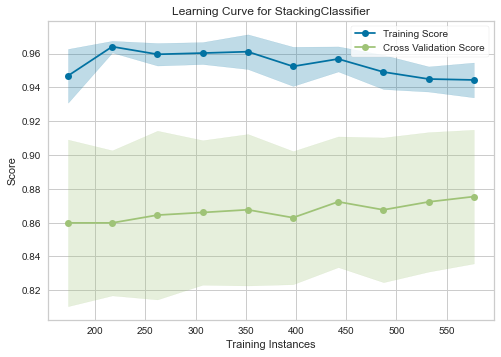

In [64]:
plot_model(estimator=tuned_model,plot='learning')

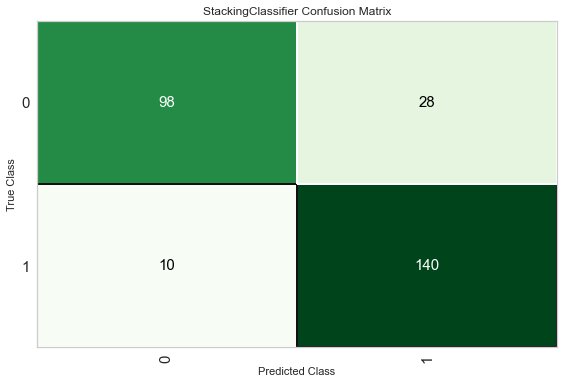

In [65]:
plot_model(estimator=tuned_model,plot='confusion_matrix')

## Predict Model

In [66]:
pred = predict_model(tuned_model, data = x_test)

In [67]:
pred

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Label,Score
608,62,M,ASY,158,170,0,ST,138,Y,0.0,Flat,1,0.9192
862,65,F,NAP,155,269,0,Normal,148,N,0.8,Up,0,0.8937
721,51,M,NAP,100,222,0,Normal,143,Y,1.2,Flat,1,0.6362
636,48,M,ATA,130,245,0,LVH,180,N,0.2,Flat,1,0.7157
692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0,0.9601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,52,M,NAP,138,223,0,Normal,169,N,0.0,Up,0,0.9687
620,65,M,ASY,120,177,0,Normal,140,N,0.4,Up,0,0.7000
861,65,M,ASY,110,248,0,LVH,158,N,0.6,Up,1,0.5470
842,43,F,ASY,132,341,1,LVH,136,Y,3.0,Flat,1,0.9046


In [68]:
final_tuned_model = finalize_model(tuned_model)

In [69]:
final_tuned_model

StackingClassifier(cv=5,
                   estimators=[('lda',
                                LinearDiscriminantAnalysis(n_components=None,
                                                           priors=None,
                                                           shrinkage=None,
                                                           solver='svd',
                                                           store_covariance=False,
                                                           tol=0.0001)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x0000017C2F5546D0>),
                               ('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate

In [70]:
save_model(tuned_model, 'HeartDisease_Pred_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='HeartDisease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                                                            max_depth=10,
                                                                            max_features='sqrt',
                                                